# DS2002 Midterm exam 2022
# YourUserID: xxxxxxxx
## General 
This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the last 6 Assignments. Some basic rules: 
- You are allowed to use any document and source and look up documents on the internet. 
- You or not allowed to share documents, or communicate in any other way with people during period of final. Given that there are students with extra time, this is until 3pm, March 3d.  
- All the code you are using from previous assignments or labs needs to be included in the notebook. 
- Most questions also require some written answer. The answer to these questions should be given in full English sentences. 
- All Figures should be appropriately labeled and should have a figure caption. 
- The Midterm needs to be submitted on OWL (Test + Quizzes) before 12 30 pm. If you have approved accommodation, you need to submit after 2 hrs + your extra time after the start of the exam at 10 30am. 

## Preliminaries

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as sps
import pandas as pd 
import numpy as np
import scipy.optimize as so
import seaborn as sns

## Data set
With growing challenges of congestion, excessive land use for parking, climate change, health-cost due to lack of exercise, and dying downtowns, cities across the world are looking towards finding ways of encouraging walking and cycling as alternative modes of transportation. How to achieve a sustainable change is a complex issue and a topic of extensive discussion in many North-American cities. The data set consists of daily counts of the number of bicycles at two selected locations on bike trails in Ottawa from January 2016- June 2020. The two locations are 08SOMO: Somerset bridge over O-Train and 10OGLD: O-Train Pathway just north of Galdstone Avenue. The csv-file (`bike_count.csv`) has the following columns: 

-year: Year of recording 2016-2020

-month: Month running from January (1) to December (12)

-day: Day of the week: Monday (0) to Sunday (6) 

-daysSince: Days since the begin of the data set (since 1/1/2016)

-monthsSince: Month since the begin of the data set (since 1/1/2016)

-place: Place of recording: 08SOMO ot 10OGLD. 

-bikecount: Number of bikes per day in both directions, assessed with automatic counter. Note that some counters are not very good, especially in the winter. 

Source and more information: 
https://open.ottawa.ca/datasets/bicycle-trip-counters



# Task 1: Days of the Week (22 pts)
In the first task, we will look at bike counts and study if there is more weekend (recreational, shopping) or weekday (likely commuting) bike traffic. 

## Question 1.1 (3 pts)
Read the data set `bike_count.csv` into a pandas data frame. Written answer: How many observations and how many variables do you have?  

In [4]:
df = pd.read_csv("bike_count.csv")
df.head()

,year,month,day,daysSince,monthsSince,place,bikecount
0,2016,1,4,0,1,08SOMO,4
1,2016,1,5,1,1,08SOMO,8
2,2016,1,6,2,1,08SOMO,4
3,2016,1,0,3,1,08SOMO,16
4,2016,1,1,4,1,08SOMO,70


In [5]:
print(f"there are {len(df.index)} observtions in this dataset") #rows
print(f"there are {len(df.columns)} variables in this dataset")

there are 3286 observtions in this dataset
there are 7 variables in this dataset


Written answer:

##  Question 1.2 (4 pts)
Generate a bar plot of the bicycle count as a function of the day of week (on the x-axis). Written answer: What weekday-weekend effect do you see (if any)?

<AxesSubplot:xlabel='day', ylabel='bikecount'>

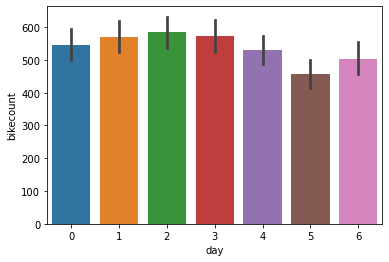

In [6]:
sns.barplot(x="day", y="bikecount", data=df)

Written answer: high during the week, low on weekend

##  Question 1.3 (5 pts)
Create a new variable/column ('weekend') in the dataframe that encodes whether the day is a weekend day (day==5 or day==6) vs. a week day (day between 0-4). 

Calculate and report the mean number of bikes separately for weekdays and weekends. Then, calculate and report the median for each group. How do mean and median compare?

In [9]:
#df['weekend'] = mvdf['boxoff'] - mvdf['prodcost']

df['weekend'] = df['day'] >= 5
df.head()


,year,month,day,daysSince,monthsSince,place,bikecount,weekend
0,2016,1,4,0,1,08SOMO,4,False
1,2016,1,5,1,1,08SOMO,8,True
2,2016,1,6,2,1,08SOMO,4,True
3,2016,1,0,3,1,08SOMO,16,False
4,2016,1,1,4,1,08SOMO,70,False


In [13]:
sg = df['bikecount'].groupby(df['weekend'])
sg_week_mean=sg.get_group(False).mean()
sg_wknd_mean=sg.get_group(True).mean()
print(sg_week_mean)
print(sg_wknd_mean)
sg_week_med=sg.get_group(False).median()
sg_wknd_med=sg.get_group(True).median()
print(sg_week_med)
print(sg_wknd_med)

560.6217021276595
480.65064102564105
426.0
287.5


Written answer: 

##  Question 1.4 (5 pts)
As you will see from Question 1.3, looking at the mean counts and the median counts gives quite different answers. Which analysis would you trust more? To answer this, look at the distribution of the bike counts. Written answer: What characteristic of the distribution makes the means or medians a better description of central tendency? 

Written answer: 

##  Question 1.5 (5 pts)
Create a figure with two panels. In one panel, visualize bike counts for weekdays and weekends separately using boxplot. On the second panel, visualize the same data using violinplot.

Written answer: compare the two graphs. Which plot gives you a better idea about the shape of the distributon? What are the benefits/strengths of using each of these plots? 

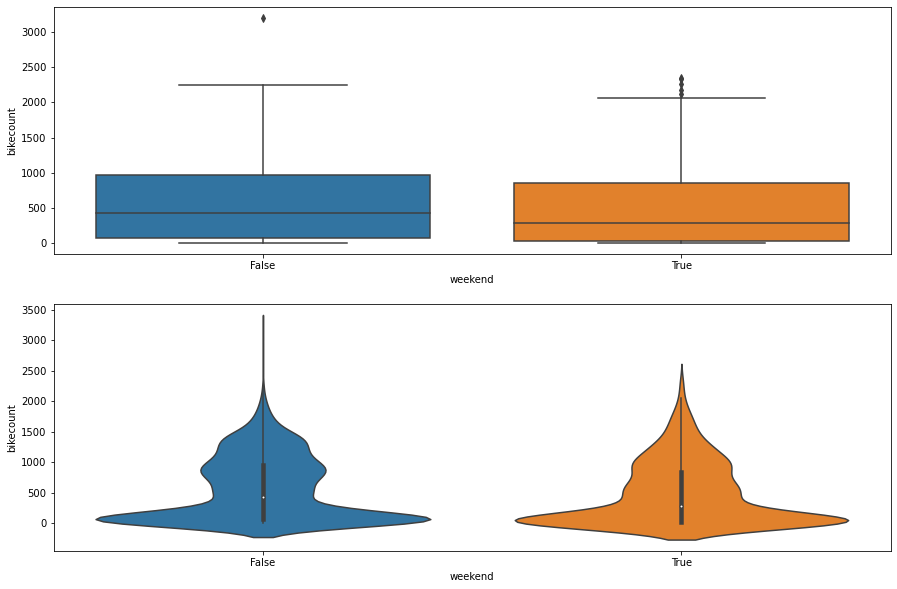

In [24]:
(fig, axes) = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))


sns.boxplot(x = 'weekend', y = 'bikecount', data = df, ax=axes[0])
sns.violinplot(x = 'weekend', y = 'bikecount', data = df, ax=axes[1])

plt.show()

Written answer:

# Task 2:  Randomization (25 pts)
## Question 2.1 (3pts)
We want to test whether there is a significant difference between the median number of people riding their bikes on weekdays and weekdays. How would you formulate this hypothesis? What is the null-hypothesis in this case? Is H1 a one-sided or two-sided hypothesis?

Written answer: 

##  Question 2.2 (7pts)
Define a function that takes in a dataframe and calculates and returns the difference between the median number of bikes observed on weekdays and weekends. Apply this function to the dataframe and report the empirical statistic (median difference).

NOTE: If you are missing the 'weekend' variable from the previous questions, think of a different variable to use in its place so that you can still complete the task.

In [26]:
def med_diff(D):
    sg = D['bikecount'].groupby(D['weekend'])
    sg_week_med=sg.get_group(False).median()
    sg_wknd_med=sg.get_group(True).median()
    diff = sg_week_med - sg_wknd_med
    return diff

t = med_diff(df)
print(t)

138.5


## Question 2.3 (15pts)
Perform a randomization test to test whether you can reject the Null-hypothesis formulated in Question 2.1. Your code should produce a figure that shows the distribution of chosen test statistics under the Null hypothesis, as well as the empirical value as a vertical line.  Remember to provide axis lables and a caption. Written answer: Report the value of the statistics and the associated p-value, using at least 1000 iterations. What do you conclude regarding the hypotheses formulated above? 


SD of the randomisation samples 56.433
 P-value of the randomisation test is p=  0.015


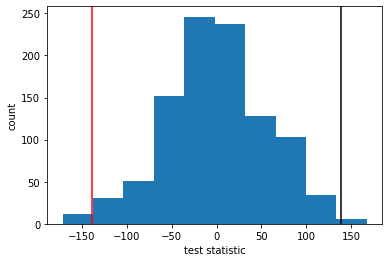

In [48]:
#perform randomization
def performRandomization(D,fcn,shuffle,numIterations=1000,sides=1, nbins = 10):    
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data 
        S=D.copy()                    # Make copy of the data frame
        x = np.array(range(len(D.index))) # Make copy of the data frame
        np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself! 
        y = S[shuffle].iloc[x]   # copy the newly reorded values into a new Series  
        y = y.reset_index(drop=True)   #reoder the indices 
        S[shuffle]=y           # Copy back into the data frame
        
        #2. Calculate test statistics 
        listOfTS[i] = fcn(S)

    # 3. Caluclate the real test statistic 
    realTS = fcn(D)
      
    # 4. Plot a histogram of the 
    plt.hist(listOfTS,bins= nbins)
    plt.xlabel('test statistic')
    plt.ylabel('count')
    plt.axvline(x=realTS, color='k')
    
    print('SD of the randomisation samples %.3f' % np.std(listOfTS))

    
    # 5. determine p-value (one sided)
    if sides==1: 
        p=sum(listOfTS>=realTS)/len(listOfTS)
    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=realTS)/len(listOfTS)
        print(' P-value of the randomisation test is p= ',p)
    return p

ran = performRandomization(df,med_diff,"weekend",numIterations=1000,sides=2, nbins = 10)


Written answer:

# Task 3: Year-to-year change in bike use (43 pts)
In 2016, the City of Ottawa constructed a 15km network of bike lanes, with the goal to increase bike traffic to and from downtown. The construction was finished in the end of 2017 and bike lanes were opened in 2018. The city meticulously counted bike traffic at two critical locations of the main bike trail leading to downtown. We want to compare the number of bikes observed in 2017 and 2018 in order to see whether the number of bikes increased after the bike lanes were built.

## Question 3.1 (4 pts)
Plot bike counts as a function of year (on the x axis) using the bar plot. Written answer: Based on what you observe, do you think there is a difference in number of bikes in 2018 (right after the bike lanes were opened) and previous year (2017)?

<AxesSubplot:xlabel='year', ylabel='bikecount'>

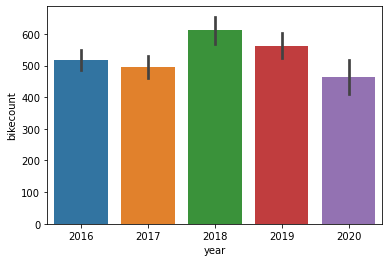

In [29]:
sns.barplot(x="year", y="bikecount", data=df)

Written answer:

## Question 3.2 (5 pts)
As we can see from the plot above, there seems to be an increase in average bike count from 2017 to 2018. We want to test whether this difference is significant by again using the randomization test. Formulate null- and alternative hypotheses. Is H1 one-sided or two-sided? Why?


Written answer: 

## Question 3.3 (8 pts)
Create a copy of the original dataset. Next, create a subset of this full dataset so that it only includes the data from the years 2017 and 2018 (4 points). Visualize the bike counts as a function of year using boxplot (4 points).

<AxesSubplot:xlabel='year', ylabel='bikecount'>

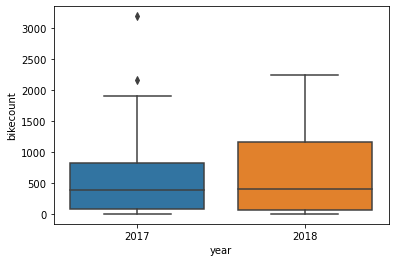

In [37]:
C=df.copy()# Make copy of the data frame
C1 = C[C['year'] >=2017]
C2 = C1[C1['year'] <=2018]
sns.boxplot(x = "year", y = "bikecount", data = C2)

## Question 3.4 (8 pts)
Define a function that calculates the mean difference in bike counts between 2017 and 2018 (4 points) Use the randomization function from question 2.3 again to test whether this difference is significant (2 points). Written answer: what do you conclude? (2 points)


In [49]:
def mean_diff(D):
    sg = D['bikecount'].groupby(D['year'])
    sg_2017_mean=sg.get_group(2017).mean()
    sg_2018_mean=sg.get_group(2018).mean()
    diff = sg_2018_mean - sg_2017_mean
    return diff

t = mean_diff(df)
print(t)

115.841095890411


SD of the randomisation samples 27.847


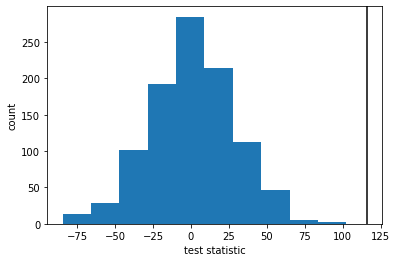

In [51]:
ranfunc = performRandomization(df,mean_diff,"year",numIterations=1000,sides=1, nbins = 10)

Written answer:

## Question 3.5 (11 pts)
Now that we established that there is a significant increase in mean bike counts in 2018, we want to make a more precise claim about how much it increased between 2017 and 2018. Written answer: formulate two competing hypotheses, one stating that the increase was 10% and another one that it was 30% (1 point).

Use groupby to calculate the mean bike count for 2017 and 2018 and calculate the difference between them (2 points). Calculate the values that represent a 10% and a 30% increase in mean bike count from the mean of 2017 (3 points). Use the function for the normal distribution to simulate the distributions under the two hypotheses using the corresponding means and the standard deviation from the null distribution from question 3.4 (5 points).


Written answer:

In [56]:
sg = df['bikecount'].groupby(df['year'])
b17 = sg.get_group(2017)
b18 = sg.get_group(2018)
m17=sg.get_group(2017).mean()
m18=sg.get_group(2018).mean()
diff = m18-m17
print(diff)
inc10 = m17*1.1 
inc30 = m17*1.3

SD = 27.5

p0 = sps.norm.pdf(m18,inc10,SD) # Probability of data under the H0 (p(Data|H0))
print(p0)
p1 = sps.norm.pdf(m18,inc30,SD) # Probability of the data under the H1 (p(Data|H1))
print(p1)
BF = p1/p0  # Bayes factor 
BF

115.841095890411
0.0007999372468515477
0.007039920776985997


8.800591302248069

## Question 3.6 (2 pts)
Plot the histograms for the two distributions in the same plot. Plot a vertical line showing the empirical mean difference that we just calculated in question 3.4.

/Users/oren/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/oren/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


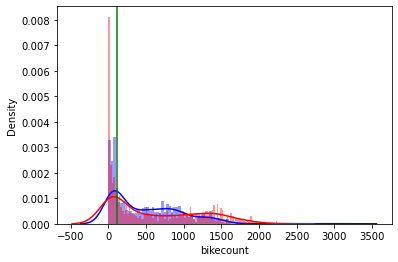

In [58]:
#distplot
hist = sns.distplot(b17, bins = 100, color = 'b')
hist = sns.distplot(b18, bins = 100, color = 'r')
plt.axvline(x = mean_diff(df), color = 'green')


## Question 3.7 (6 pts)
Calculate and report the Bayes Factor for these hypotheses. Written answer: how do you interpret the resulting Bayes factor?

Written answer: 

# Task 4: Interpretation (10 points)
**Experiment failed: Bike lanes only temporary encourage biking.** 

In 2016, the City of Ottawa decided to conduct an $40M *experiment*. They constructed a 15km network of bike lanes, with the goal to increase bike traffic to and from downtown. The construction was finished in the end of 2017 and bike lanes were opened early in 2018. The city meticulously counted bike traffic at two critical locations of the main bike trail leading to downtown. As can be seem from the figure below, number of bike trips per day showed a modest increase to slightly more than an average of 600 per day. From this we can clearly conclude that the construction of the bike network *caused* an increase of bike traffic *in all of Ottawa*. However, by 2020, the average number of bike trips had already reduced again to *below the level of 2016*. Thus, *constructing more bike lanes increases bicycle use in cities for a brief period only*.   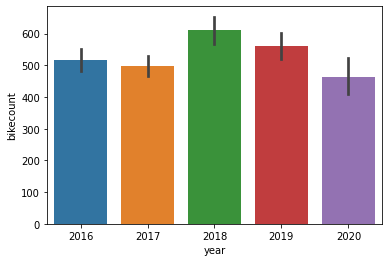

Written answer: Criticize the above report in terms of the way the data scientist uses the available evidence to construct an argument. Focus on the words / phrases that are highlighted in *italics*. For each of these phrases, state to what degree this statement is justified, and / or why the statement is wrong / why one would need to be careful with arriving at such a conclusion. Think about causal claims, generalization, and confounding variables. For each point you raise, sketch out how the study or report would need to be fixed to address the problem.  
